In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.multivariate.manova import MANOVA

## Loading the Dataset

In [2]:
df = pd.read_csv('datasheet1.csv')
df.head()

,NTSBNumber,AccidentReport,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,...,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightScheduledType,FlightTerminalType,FlightServiceType,FlightOperationType,DefiningEvent,PhaseOfFlight,IntentionalAct
0,GAA19CA118,AccidentReport,2019-01-02,Appleton,Minnesota,United States,45.227500,-96.004447,NaN,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Loss of Control on Ground,Landing,NaN
1,GAA19CA124,AccidentReport,2019-01-02,Santa Maria Island,Florida,United States,27.500000,-82.746665,NaN,1.0,...,Substantial,Helicopter,Part 91: General aviation,NaN,NaN,NaN,Aerial observation,Loss of Control In-Flight,Maneuvering,NaN
2,WPR19LA054,AccidentReport,2019-01-02,Sacramento,California,United States,38.600833,-121.503334,1.0,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Abnormal Runway Contact,Landing,NaN
3,WPR19LA055,AccidentReport,2019-01-02,Townsend,Montana,United States,46.289165,-111.519447,NaN,2.0,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Low Altitude Operation,Maneuvering,NaN
4,ERA19LA085,AccidentReport,2019-01-03,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,NaN,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Fuel Related,Approach,NaN


## Summary of Dataset

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NTSBNumber                      1234 non-null   object 
 1   AccidentReport                  1234 non-null   object 
 2   AccidentDate                    1234 non-null   object 
 3   City                            1234 non-null   object 
 4   StateOrRegion                   1214 non-null   object 
 5   Country                         1234 non-null   object 
 6   Latitude                        1231 non-null   float64
 7   Longitude                       1231 non-null   float64
 8   FatalInjuries                   289 non-null    float64
 9   SeriousInjuries                 231 non-null    float64
 10  HighestInjuryLevel              1234 non-null   object 
 11  AircraftNumber                  1234 non-null   int64  
 12  DamageLevel                     12

,Latitude,Longitude,FatalInjuries,SeriousInjuries,AircraftNumber
count,1231.000000,1231.000000,289.000000,231.000000,1234.000000
mean,38.279218,-98.930404,1.453287,0.987013,1.012156
std,8.538461,24.683839,1.462042,0.754583,0.109625
min,-35.897777,-164.611380,0.000000,0.000000,1.000000
25%,33.218750,-115.027088,1.000000,1.000000,1.000000
50%,37.807220,-96.006668,1.000000,1.000000,1.000000
75%,42.016527,-82.627499,2.000000,1.000000,1.000000
max,69.219818,150.144439,11.000000,5.000000,2.000000


## Data Preprocessing

In [4]:
df.duplicated().sum()

0

In [5]:
df.isna().sum()

NTSBNumber                           0
AccidentReport                       0
AccidentDate                         0
City                                 0
StateOrRegion                       20
Country                              0
Latitude                             3
Longitude                            3
FatalInjuries                      945
SeriousInjuries                   1003
HighestInjuryLevel                   0
AircraftNumber                       0
DamageLevel                          0
AircraftCategory                     0
RegulationFlightConductedUnder       0
FlightScheduledType               1229
FlightTerminalType                1230
FlightServiceType                 1233
FlightOperationType                 10
DefiningEvent                        4
PhaseOfFlight                        0
IntentionalAct                    1232
dtype: int64

In [6]:
# Dropping unnecessary columns
df.columns
df.drop(['FlightScheduledType', 'FlightTerminalType', 'FlightServiceType', 'IntentionalAct'], inplace = True, axis=1)
df.head()

,NTSBNumber,AccidentReport,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,HighestInjuryLevel,AircraftNumber,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightOperationType,DefiningEvent,PhaseOfFlight
0,GAA19CA118,AccidentReport,2019-01-02,Appleton,Minnesota,United States,45.227500,-96.004447,NaN,NaN,None,1,Substantial,Airplane,Part 91: General aviation,Instructional,Loss of Control on Ground,Landing
1,GAA19CA124,AccidentReport,2019-01-02,Santa Maria Island,Florida,United States,27.500000,-82.746665,NaN,1.0,Serious,1,Substantial,Helicopter,Part 91: General aviation,Aerial observation,Loss of Control In-Flight,Maneuvering
2,WPR19LA054,AccidentReport,2019-01-02,Sacramento,California,United States,38.600833,-121.503334,1.0,NaN,Fatal,1,Substantial,Airplane,Part 91: General aviation,Personal,Abnormal Runway Contact,Landing
3,WPR19LA055,AccidentReport,2019-01-02,Townsend,Montana,United States,46.289165,-111.519447,NaN,2.0,Serious,1,Substantial,Airplane,Part 91: General aviation,Personal,Low Altitude Operation,Maneuvering
4,ERA19LA085,AccidentReport,2019-01-03,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,NaN,NaN,None,1,Substantial,Airplane,Part 91: General aviation,Instructional,Fuel Related,Approach


In [7]:
df.drop(df[(df['Latitude'].isna())].index, inplace=True)
df.drop(df[(df['Longitude'].isna())].index, inplace=True)

Filling NA values in FatalInjuries and SeriousInjuries with 0 since the number of fatalities or serious injuries if not mentioned is 0.

In [8]:
df['FatalInjuries'] = df['FatalInjuries'].fillna(0)
df['SeriousInjuries'] = df['SeriousInjuries'].fillna(0)

Encoding string attributes to numbers

In [9]:
df['code_def_event'], unique_def_event = pd.factorize(df['DefiningEvent'], sort=True)
df['code_def_event'] = df['code_def_event'] + 1


In [10]:
df['code_phase_flight'], unique_def_event = pd.factorize(df['PhaseOfFlight'], sort=True)
df['code_phase_flight'] = df['code_phase_flight'] + 1


In [11]:
df['code_flight_op_type'], unique_def_event = pd.factorize(df['FlightOperationType'], sort=True)
df['code_flight_op_type'] = df['code_flight_op_type'] + 1


In [30]:
df['code_high_inj_level'], unique_def_event = pd.factorize(df['HighestInjuryLevel'], sort=True)
df['code_high_inj_level'] = df['code_high_inj_level'] + 1

In [31]:
df['code_damage_level'], unique_def_event = pd.factorize(df['DamageLevel'], sort=True)
df['code_damage_level'] = df['code_damage_level'] + 1

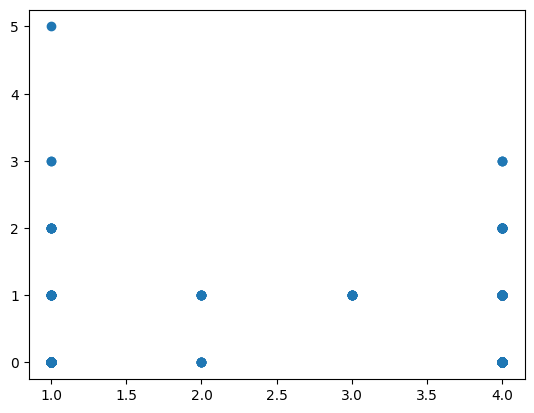

In [36]:
plt.scatter(df['code_damage_level'], df['SeriousInjuries'])

In [12]:
df.head(20)

,NTSBNumber,AccidentReport,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,...,AircraftNumber,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightOperationType,DefiningEvent,PhaseOfFlight,code_def_event,code_phase_flight,code_flight_op_type
0,GAA19CA118,AccidentReport,2019-01-02,Appleton,Minnesota,United States,45.227500,-96.004447,0.0,0.0,...,1,Substantial,Airplane,Part 91: General aviation,Instructional,Loss of Control on Ground,Landing,15,5,12
1,GAA19CA124,AccidentReport,2019-01-02,Santa Maria Island,Florida,United States,27.500000,-82.746665,0.0,1.0,...,1,Substantial,Helicopter,Part 91: General aviation,Aerial observation,Loss of Control In-Flight,Maneuvering,14,6,2
2,WPR19LA054,AccidentReport,2019-01-02,Sacramento,California,United States,38.600833,-121.503334,1.0,0.0,...,1,Substantial,Airplane,Part 91: General aviation,Personal,Abnormal Runway Contact,Landing,1,5,14
3,WPR19LA055,AccidentReport,2019-01-02,Townsend,Montana,United States,46.289165,-111.519447,0.0,2.0,...,1,Substantial,Airplane,Part 91: General aviation,Personal,Low Altitude Operation,Maneuvering,17,6,14
4,ERA19LA085,AccidentReport,2019-01-03,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,0.0,0.0,...,1,Substantial,Airplane,Part 91: General aviation,Instructional,Fuel Related,Approach,9,1,12
5,GAA19CA110,AccidentReport,2019-01-03,Grace,Idaho,United States,42.461944,-111.702224,0.0,0.0,...,1,Substantial,Helicopter,Part 91: General aviation,Personal,Low Altitude Operation,Maneuvering,17,6,14
6,GAA19CA112,AccidentReport,2019-01-03,Prescott,Arizona,United States,34.653331,-112.419998,0.0,0.0,...,1,Substantial,Airplane,Part 91: General aviation,Personal,Loss of Control on Ground,Landing,15,5,14
7,GAA19CA116,AccidentReport,2019-01-03,Edgewood,New Mexico,United States,35.094722,-106.164443,0.0,0.0,...,1,Substantial,Airplane,Part 91: General aviation,Personal,Loss of Control on Ground,Landing,15,5,14
8,GAA19CA117,AccidentReport,2019-01-03,Longmont,Colorado,United States,40.164165,-105.163612,0.0,0.0,...,1,Substantial,Airplane,Part 91: General aviation,Personal,Loss of Control on Ground,Landing,15,5,14
9,GAA19CA127,AccidentReport,2019-01-05,Casa Grande,Arizona,United States,32.954444,-111.765556,0.0,1.0,...,1,Substantial,Airplane,Part 91: General aviation,Personal,Loss of Control on Ground,Landing,15,5,14


In [13]:
cormat = df.corr()
cormat.style.background_gradient(cmap='coolwarm', axis=None)
#sns.heatmap(cormat);

,Latitude,Longitude,FatalInjuries,SeriousInjuries,AircraftNumber,code_def_event,code_phase_flight,code_flight_op_type
Latitude,1.000000,-0.493218,-0.040858,-0.066836,-0.073462,-0.058506,0.009786,0.074513
Longitude,-0.493218,1.000000,0.014291,0.043100,-0.012098,0.028415,-0.062306,-0.095622
FatalInjuries,-0.040858,0.014291,1.000000,0.124319,0.007697,0.078446,-0.066394,-0.015720
SeriousInjuries,-0.066836,0.043100,0.124319,1.000000,0.003435,0.086268,-0.086910,-0.046513
AircraftNumber,-0.073462,-0.012098,0.007697,0.003435,1.000000,-0.018855,0.126347,-0.005925
code_def_event,-0.058506,0.028415,0.078446,0.086268,-0.018855,1.000000,-0.127580,-0.034786
code_phase_flight,0.009786,-0.062306,-0.066394,-0.086910,0.126347,-0.127580,1.000000,-0.083668
code_flight_op_type,0.074513,-0.095622,-0.015720,-0.046513,-0.005925,-0.034786,-0.083668,1.000000


In [14]:
#df["Yield"] = df["yield"]

#model = ols("FatalInjuries ~ C(DefiningEvent, Sum) + C(PhaseOfFlight, Sum) + C(FlightOperationType, Sum) + C(DefiningEvent, Sum)*C(PhaseOfFlight, Sum)*C(FlightOperationType, Sum)", data=df).fit()
#model = ols("FatalInjuries ~ C(DefiningEvent, Sum)*C(PhaseOfFlight, Sum)*C(FlightOperationType, Sum)", data=df).fit()

#aov_table = sm.stats.anova_lm(model, typ=3)
#aov_table

In [15]:
#maov = MANOVA.from_formula('DefiningEvent + PhaseOfFlight + FlightOperationType ~ FatalInjuries', data=df)
#print(maov.mv_test())

In [25]:
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

In [26]:
from sklearn import metrics

print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Test Mean Squared Error: 1.06
Test RMSE:  1.03
Test MAE:  0.54


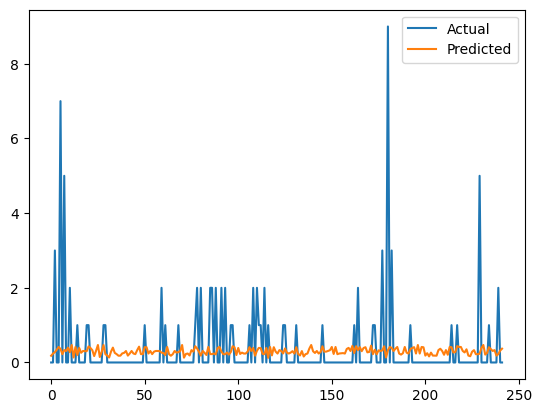

In [28]:
df_pred[['Actual', 'Predicted']].plot()
plt.show()

In [29]:
df.columns

Index(['NTSBNumber', 'AccidentReport', 'AccidentDate', 'City', 'StateOrRegion',
       'Country', 'Latitude', 'Longitude', 'FatalInjuries', 'SeriousInjuries',
       'HighestInjuryLevel', 'AircraftNumber', 'DamageLevel',
       'AircraftCategory', 'RegulationFlightConductedUnder',
       'FlightOperationType', 'DefiningEvent', 'PhaseOfFlight',
       'code_def_event', 'code_phase_flight', 'code_flight_op_type'],
      dtype='object')